<a href="https://colab.research.google.com/github/alfonso-ASA/CBS-DS-GroupWork/blob/main/Regression_Exercise_Alfonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
# Import necessary libraries
from statsmodels.graphics.gofplots import ProbPlot
!pip install statsmodels

In [115]:
df_data = pd.read_csv('/data.csv')
df_data_original = pd.read_csv('/data.csv')
df_adstock = pd.read_csv('/AdStock.csv')

In [116]:
# Display df_data as a table
df_data



,Year,Week,Ad awareness,Total media spendings (1000 kr.),TV \n(1000 kr.),Outdoor (1000 kr.),Display (1000 kr.),TV \n(GRP),Display (impressions),Creative universe 1,Creative universe 2,Creative universe 3,Creative universe 4,Competitor A media spendings (1000 kr.),Competitor B media spendings (1000 kr.)
0,2022,1,35.63%,0.0,0,0.0,0,0.0,0,1,0,0,0,151,547
1,2022,2,36.63%,4.0,0,0.0,4,0.0,1544,1,0,0,0,128,0
2,2022,3,46.79%,797.0,459,338.0,0,102.0,0,1,0,0,0,466,0
3,2022,4,46.30%,823.5,428,396.0,0,95.0,0,1,0,0,0,435,0
4,2022,5,48.58%,743.5,293,451.0,0,116.8,0,1,0,0,0,794,542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023,48,55.84%,114.0,0,114.0,0,0.0,0,0,0,0,1,357,0
100,2023,49,61.23%,0.0,0,0.0,0,0.0,0,0,0,0,1,128,0
101,2023,50,69.02%,489.0,489,0.0,0,124.0,0,0,0,0,1,0,0
102,2023,51,71.21%,566.0,566,0.0,0,144.0,0,0,0,0,1,1292,1099


In [117]:
# Display df_adstock as a table
df_adstock

,Nr.,Media input,AdStock50,AdStock70,AdStock90
0,1.0,100.0,100.00,100.00,100.00
1,2.0,NaN,50.00,70.00,90.00
2,3.0,NaN,25.00,49.00,81.00
3,4.0,NaN,12.50,34.30,72.90
4,5.0,NaN,6.25,24.01,65.61
5,6.0,NaN,3.13,16.81,59.05
6,7.0,NaN,1.56,11.76,53.14
7,8.0,NaN,0.78,8.24,47.83
8,9.0,NaN,0.39,5.76,43.05
9,10.0,NaN,0.20,4.04,38.74


In [118]:
# Remove the 'Media input' column from df_adstock
df_adstock = df_adstock.drop('Media input', axis=1)

In [119]:
df_adstock

,Nr.,AdStock50,AdStock70,AdStock90
0,1.0,100.00,100.00,100.00
1,2.0,50.00,70.00,90.00
2,3.0,25.00,49.00,81.00
3,4.0,12.50,34.30,72.90
4,5.0,6.25,24.01,65.61
5,6.0,3.13,16.81,59.05
6,7.0,1.56,11.76,53.14
7,8.0,0.78,8.24,47.83
8,9.0,0.39,5.76,43.05
9,10.0,0.20,4.04,38.74


In [120]:
print(df_data.columns)

Index(['Year', 'Week', 'Ad awareness', 'Total media spendings (1000 kr.)',
       'TV \n(1000 kr.)', 'Outdoor (1000 kr.)', 'Display (1000 kr.)',
       'TV \n(GRP)', 'Display  (impressions)', 'Creative universe 1',
       'Creative universe 2', 'Creative universe 3', 'Creative universe 4',
       'Competitor A media spendings (1000 kr.)',
       'Competitor B media spendings (1000 kr.)'],
      dtype='object')


# **Question 1 - 1. Create Adstock variables on different media groups and on competitor media spending**

In [121]:
print(df_adstock.columns)

Index(['Nr.', 'AdStock50', 'AdStock70', 'AdStock90'], dtype='object')


# **Note:**

The 'Creative Universe' variables represent different types of creative content or advertising campaigns.
These are typically categorical variables and do not have a continuous measure of advertising intensity like the media spending variables.

Adstock is a concept that's usually applied to continuous variables representing media spendings over time.
The idea is to capture the lingering effect of advertising exposure on consumer behavior, which diminishes over time.
This makes sense for variables like TV spending or Outdoor spending.

On the other hand, it's not clear how a decay effect would apply to categorical variables like 'Creative Universe'.
For example, if 'Creative Universe 1' represents one type of advertising campaign and 'Creative Universe 2' represents a different campaign,
it doesn't make sense to say that the effect of 'Creative Universe 1' decays into 'Creative Universe 2' over time.

That being said, the 'Creative Universe' variables could still be important in our analysis.
They could potentially have an impact on 'Ad awareness', and we might want to include them as predictors in our models.
However, we would typically handle these variables differently from the media spending variables.
Instead of applying an Adstock transformation, we might use dummy variables or other encoding methods to represent the different categories.


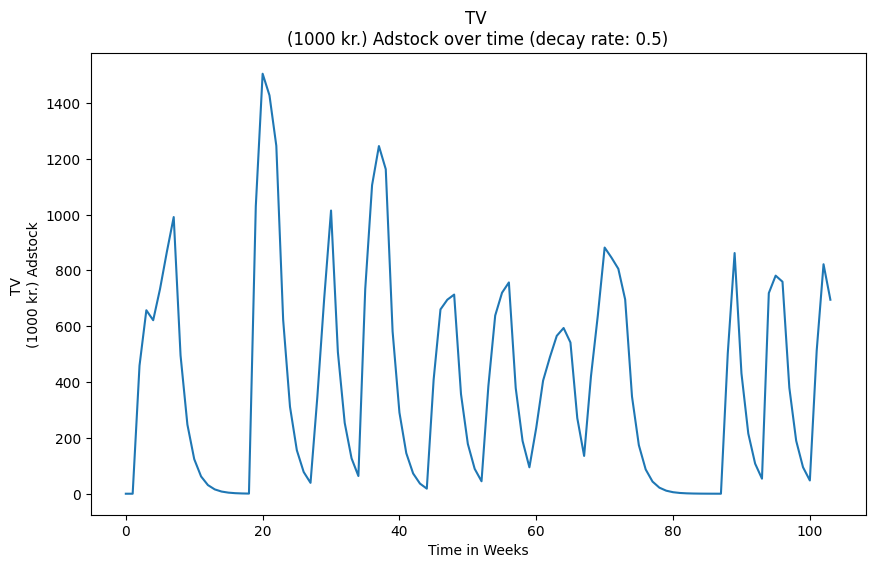

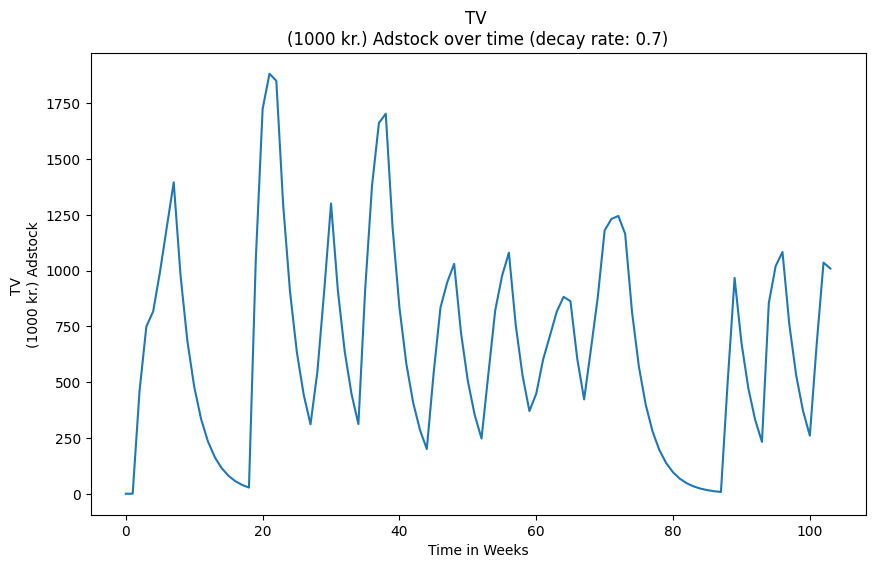

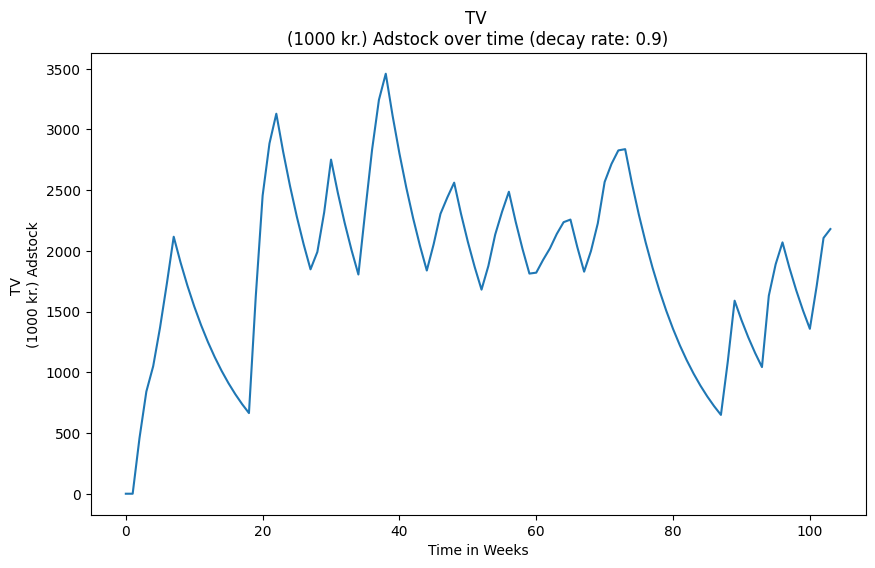

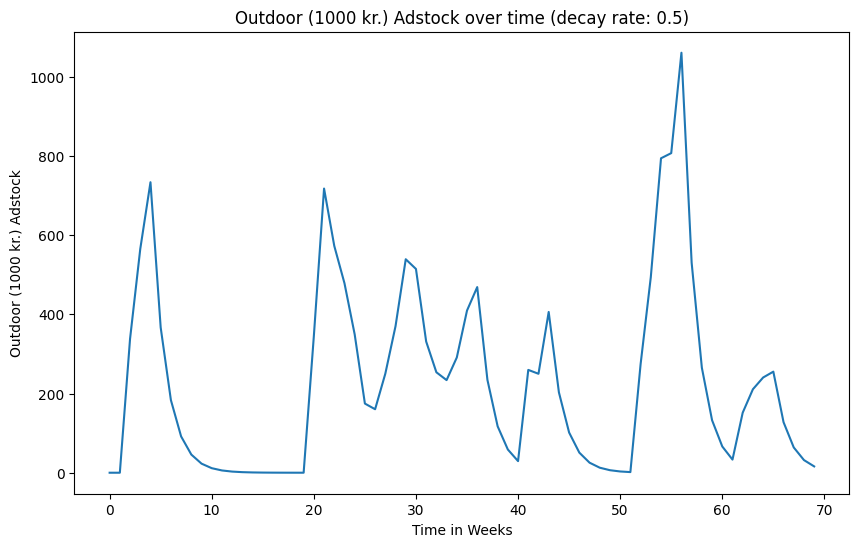

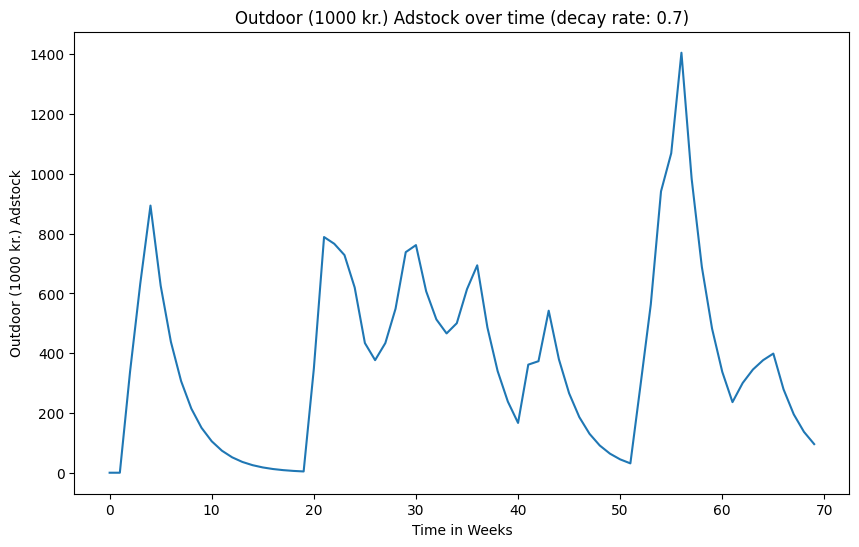

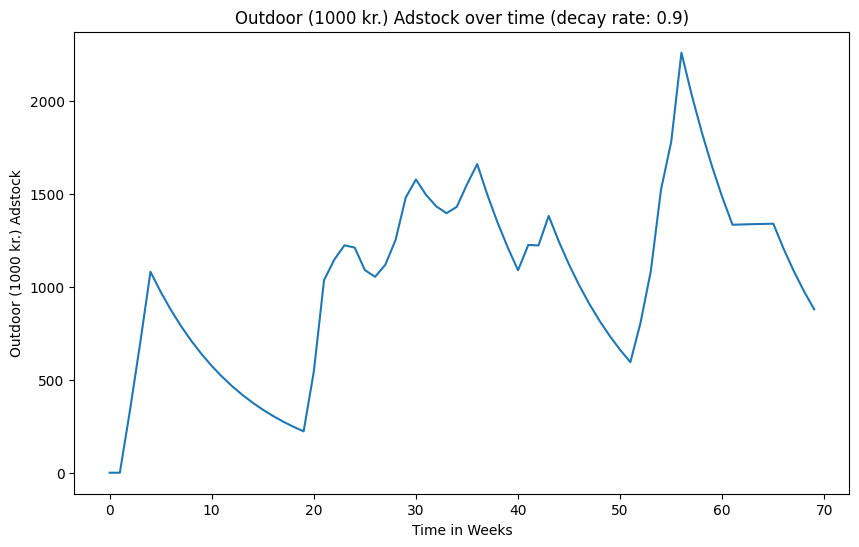

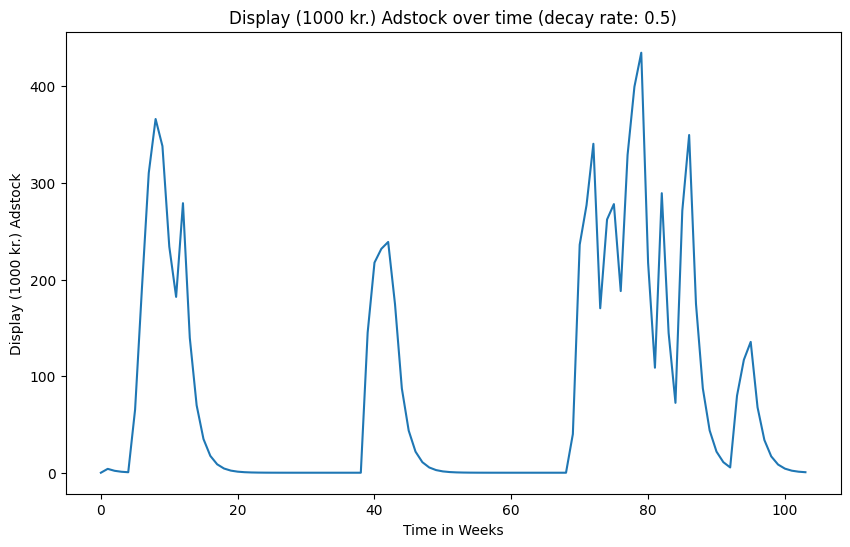

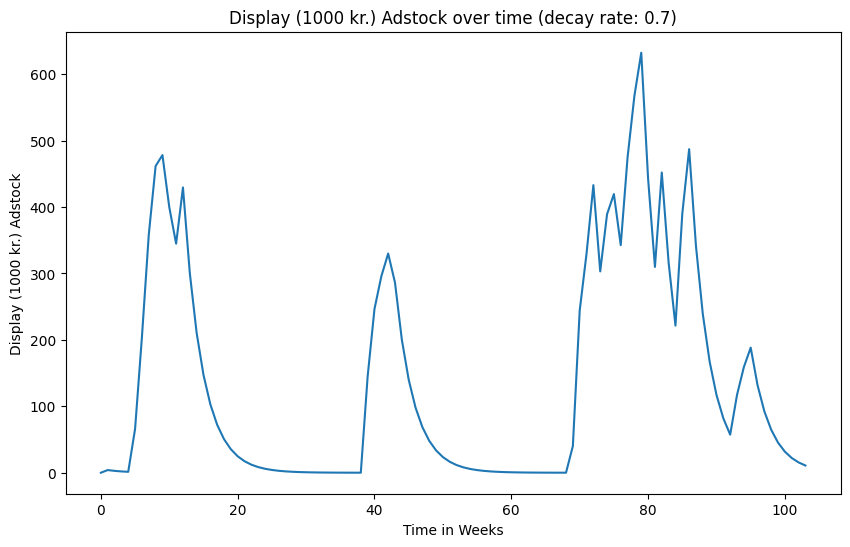

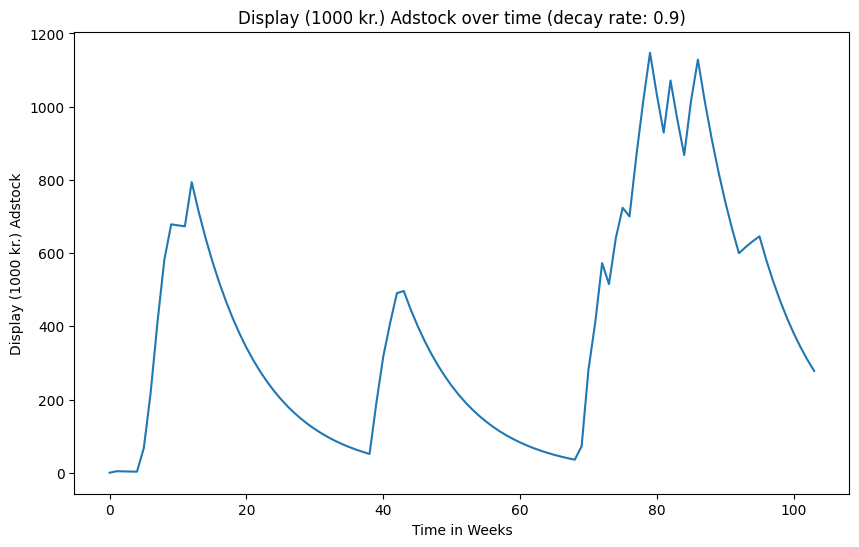

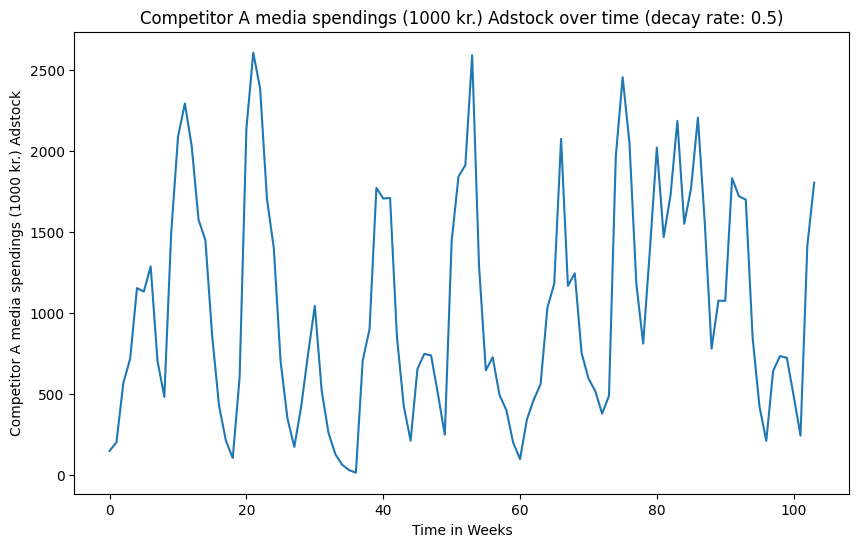

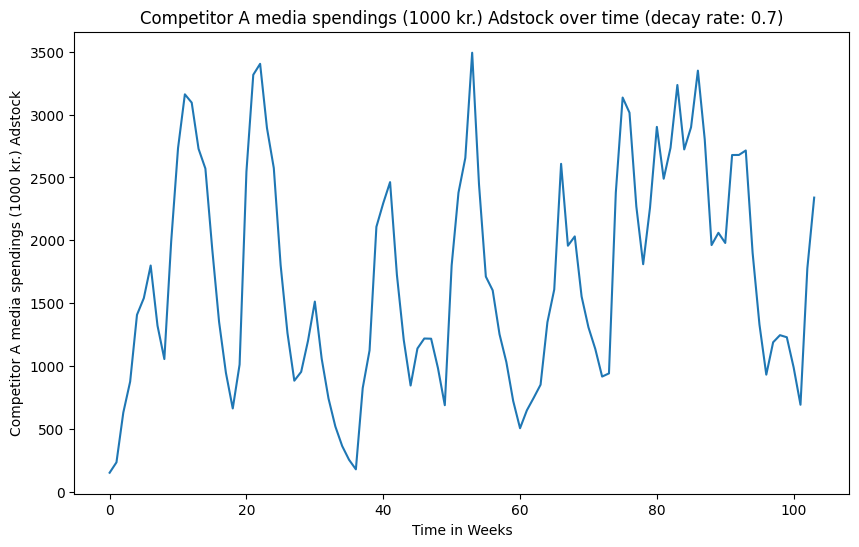

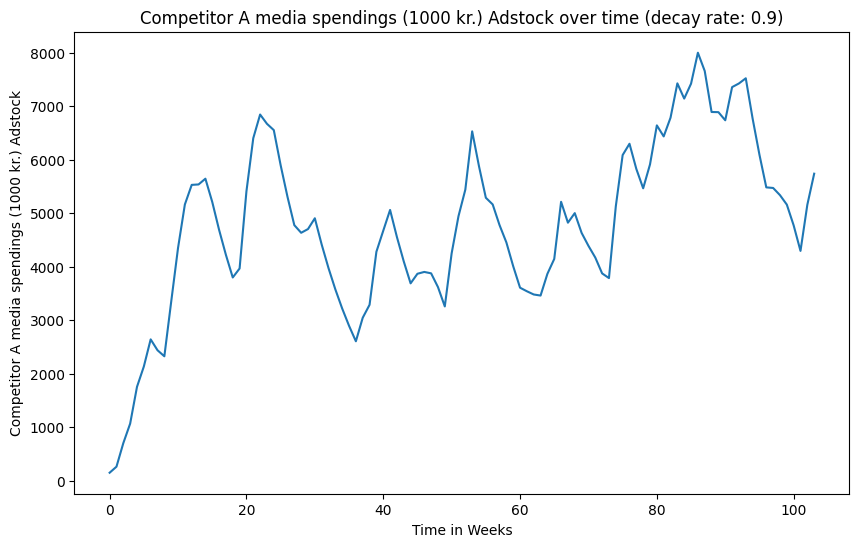

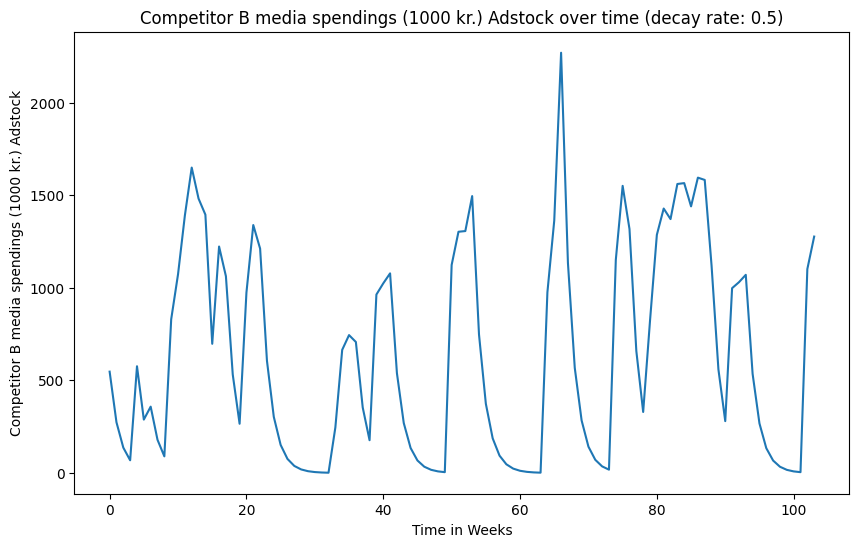

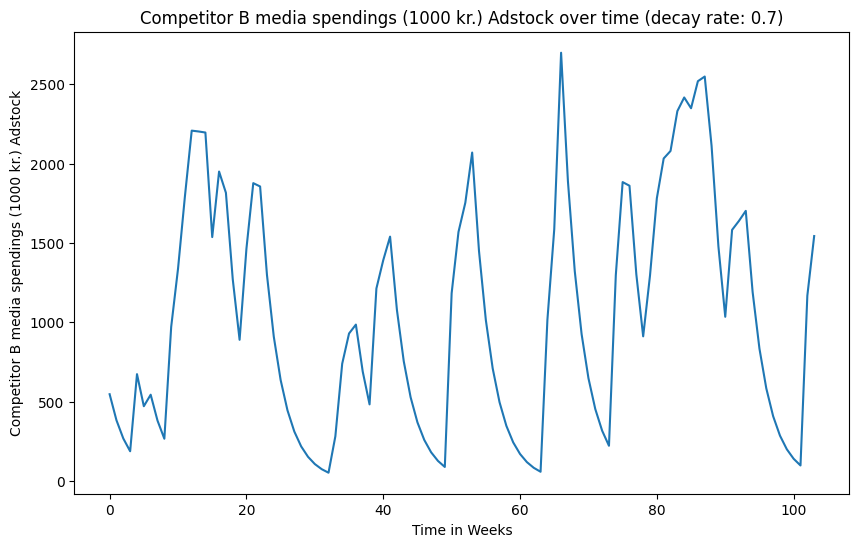

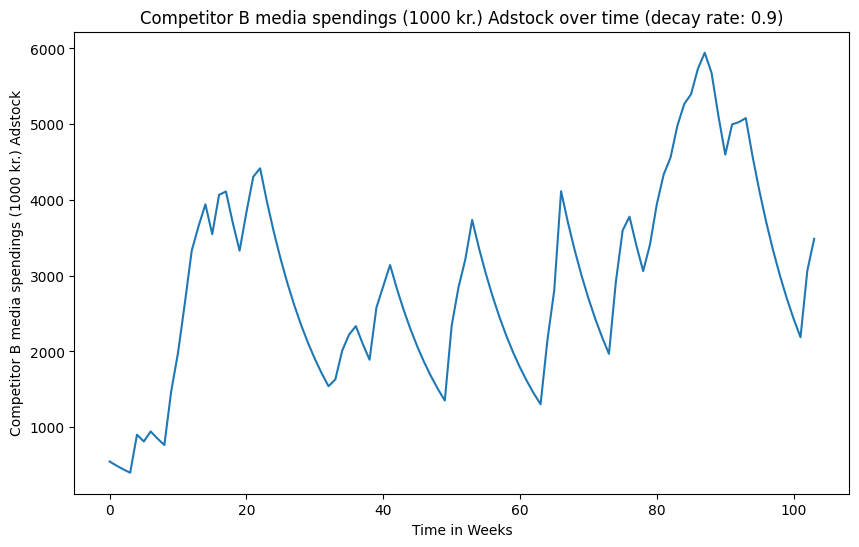

In [122]:
# List of media spending columns
media_columns = ['TV \n(1000 kr.)', 'Outdoor (1000 kr.)', 'Display (1000 kr.)',
                 'Competitor A media spendings (1000 kr.)', 'Competitor B media spendings (1000 kr.)']

def calculate_adstock(spend, rate):
    adstock = spend.copy()
    for i in range(1, len(adstock)):
        adstock[i] += rate * adstock[i-1]
    return adstock

# Create Adstock variables
for column in media_columns:
    for rate in [0.5, 0.7, 0.9]:
        df_data[column + '_adstock_' + str(rate)] = calculate_adstock(df_data[column], rate)


# Plot Adstock variables over time
for column in media_columns:
    for rate in [0.5, 0.7, 0.9]:
        plt.figure(figsize=(10,6))
        plt.plot(df_data.index, df_data[column + '_adstock_' + str(rate)])
        plt.title(column + ' Adstock over time (decay rate: ' + str(rate) + ')')
        plt.xlabel('Time in Weeks')
        plt.ylabel(column + ' Adstock')
        plt.show()

# **Question 2 - Make relevant scatter plots**

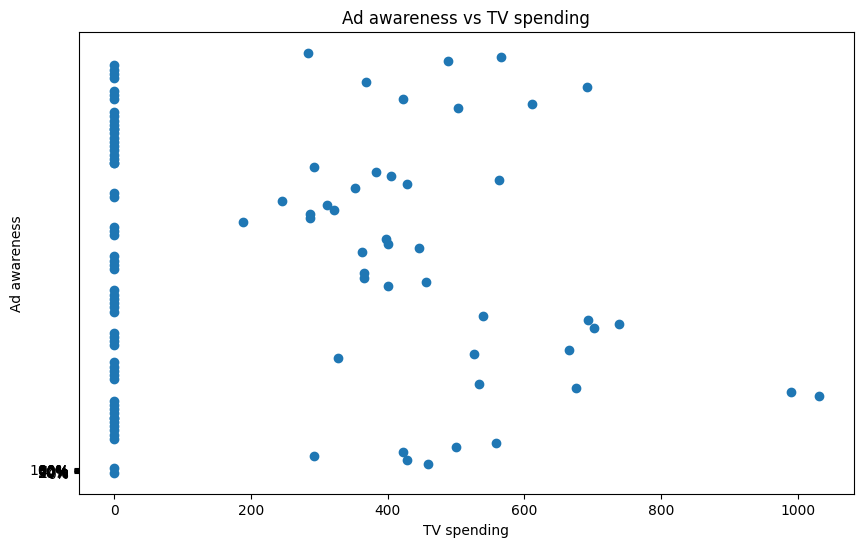

In [123]:
# Scatter plot for 'Ad awareness' and 'TV'
plt.figure(figsize=(10,6))
plt.scatter(df_data_original['TV \n(1000 kr.)'], df_data_original['Ad awareness'])
plt.title('Ad awareness vs TV spending')
plt.xlabel('TV spending')
plt.ylabel('Ad awareness')

# Simplify y-axis labels
plt.yticks(np.arange(0, 1.1, step=0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

plt.show()


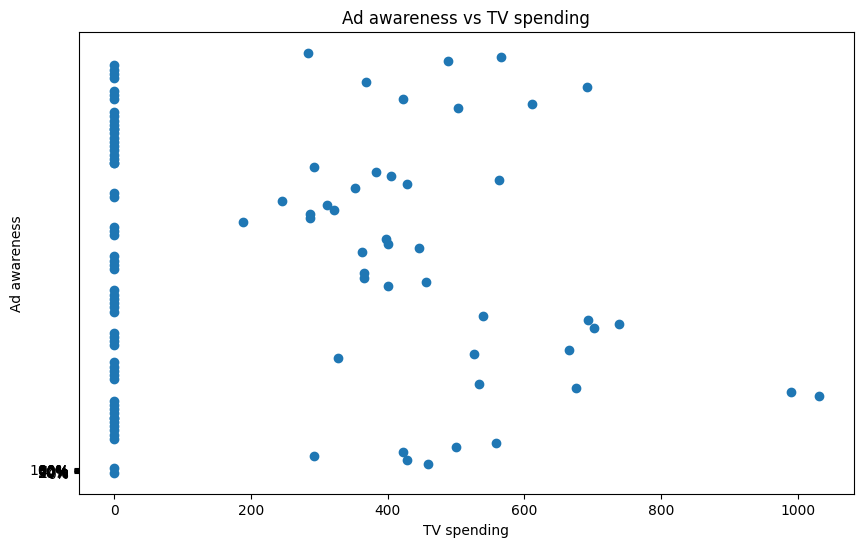

In [124]:
# Scatter plot for 'Ad awareness' and 'TV'
plt.figure(figsize=(10,6))
plt.scatter(df_data_original['TV \n(1000 kr.)'], df_data_original['Ad awareness'])
plt.title('Ad awareness vs TV spending')
plt.xlabel('TV spending')
plt.ylabel('Ad awareness')

# Simplify y-axis labels
plt.yticks(np.arange(0, 1.1, step=0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

plt.show()

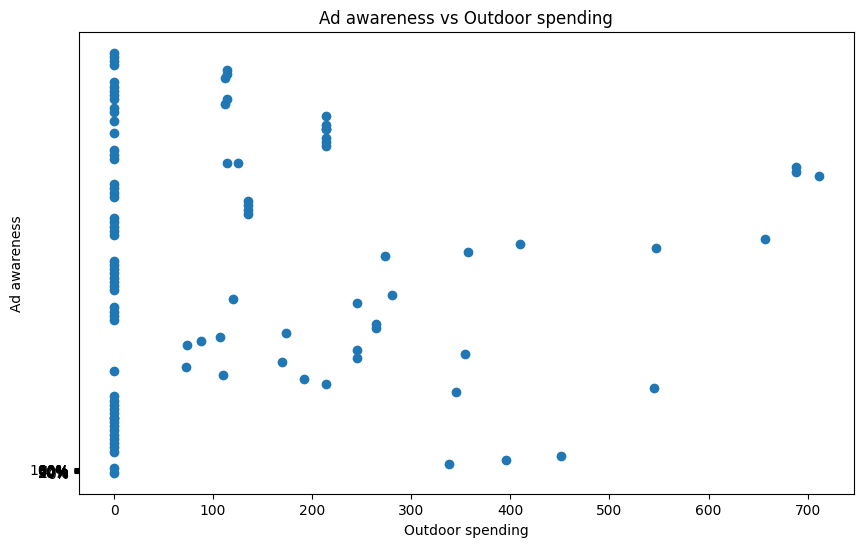

In [125]:
# Scatter plot for 'Ad awareness' and 'Outdoor'
plt.figure(figsize=(10,6))
plt.scatter(df_data_original['Outdoor (1000 kr.)'], df_data_original['Ad awareness'])
plt.title('Ad awareness vs Outdoor spending')
plt.xlabel('Outdoor spending')
plt.ylabel('Ad awareness')

# Simplify y-axis labels
plt.yticks(np.arange(0, 1.1, step=0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

plt.show()

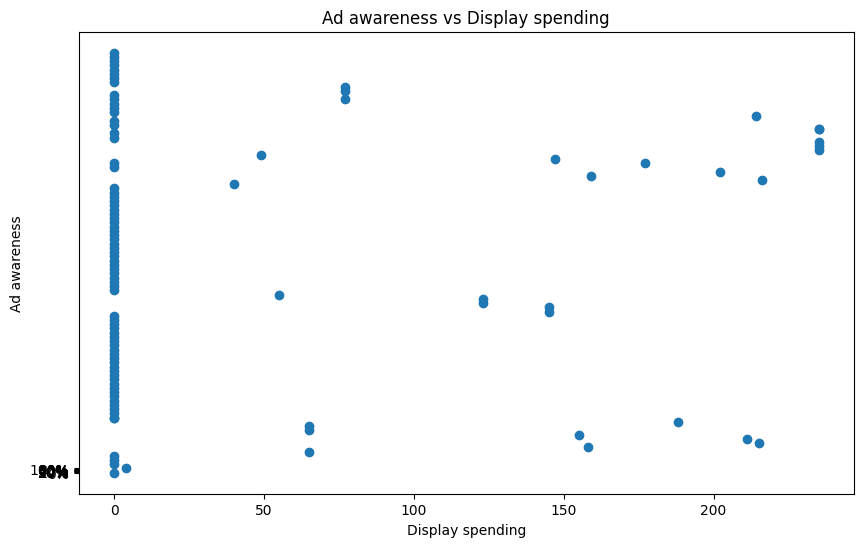

In [126]:
# Scatter plot for 'Ad awareness' and 'Display'
plt.figure(figsize=(10,6))
plt.scatter(df_data_original['Display (1000 kr.)'], df_data_original['Ad awareness'])
plt.title('Ad awareness vs Display spending')
plt.xlabel('Display spending')
plt.ylabel('Ad awareness')

# Simplify y-axis labels
plt.yticks(np.arange(0, 1.1, step=0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

plt.show()

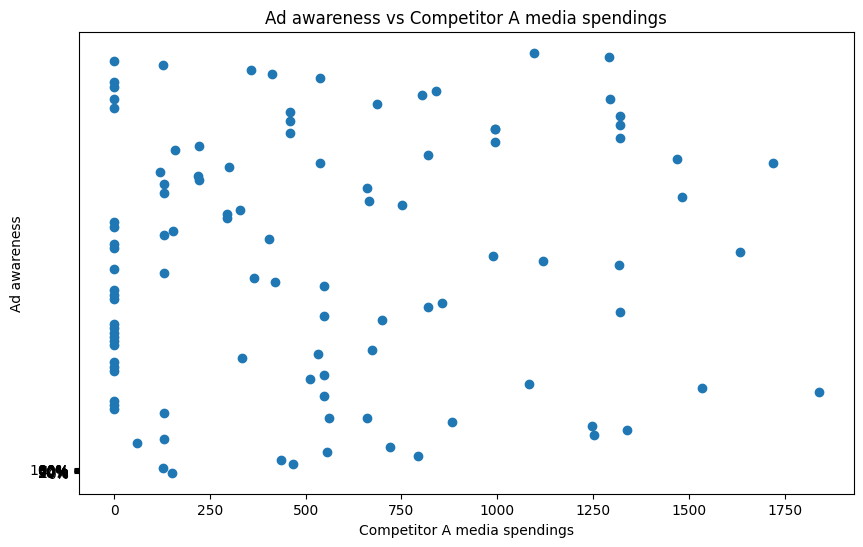

In [127]:
# Scatter plot for 'Ad awareness' and 'Competitor A media spendings'
plt.figure(figsize=(10,6))
plt.scatter(df_data_original['Competitor A media spendings (1000 kr.)'], df_data_original['Ad awareness'])
plt.title('Ad awareness vs Competitor A media spendings')
plt.xlabel('Competitor A media spendings')
plt.ylabel('Ad awareness')

# Simplify y-axis labels
plt.yticks(np.arange(0, 1.1, step=0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

plt.show()

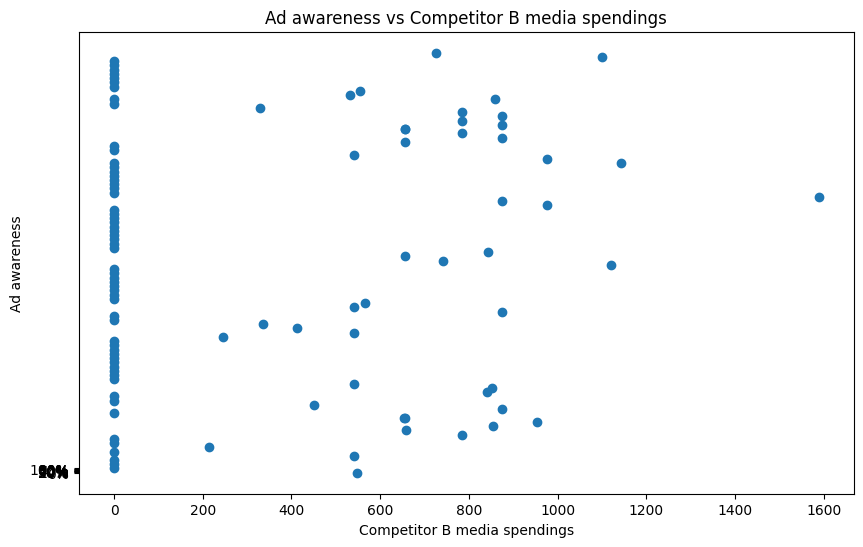

In [128]:
# Scatter plot for 'Ad awareness' and 'Competitor B media spendings'
plt.figure(figsize=(10,6))
plt.scatter(df_data_original['Competitor B media spendings (1000 kr.)'], df_data_original['Ad awareness'])
plt.title('Ad awareness vs Competitor B media spendings')
plt.xlabel('Competitor B media spendings')
plt.ylabel('Ad awareness')

# Simplify y-axis labels
plt.yticks(np.arange(0, 1.1, step=0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

plt.show()

In [129]:
# Convert 'Ad awareness' to numeric
df_data['Ad awareness'] = df_data['Ad awareness'].str.rstrip('%').astype('float') / 100.0

# Now calculate the correlation
correlation = df_data.corr()['Ad awareness']
print(correlation)

Year                                                   0.476979
Week                                                   0.245816
Ad awareness                                           1.000000
Total media spendings (1000 kr.)                       0.313669
TV \n(1000 kr.)                                        0.342950
Outdoor (1000 kr.)                                     0.253563
Display (1000 kr.)                                    -0.291808
TV \n(GRP)                                             0.367145
Display  (impressions)                                -0.226963
Creative universe 1                                   -0.509928
Creative universe 2                                   -0.147581
Creative universe 3                                    0.218568
Creative universe 4                                    0.331470
Competitor A media spendings (1000 kr.)               -0.071663
Competitor B media spendings (1000 kr.)               -0.213568
TV \n(1000 kr.)_adstock_0.5             

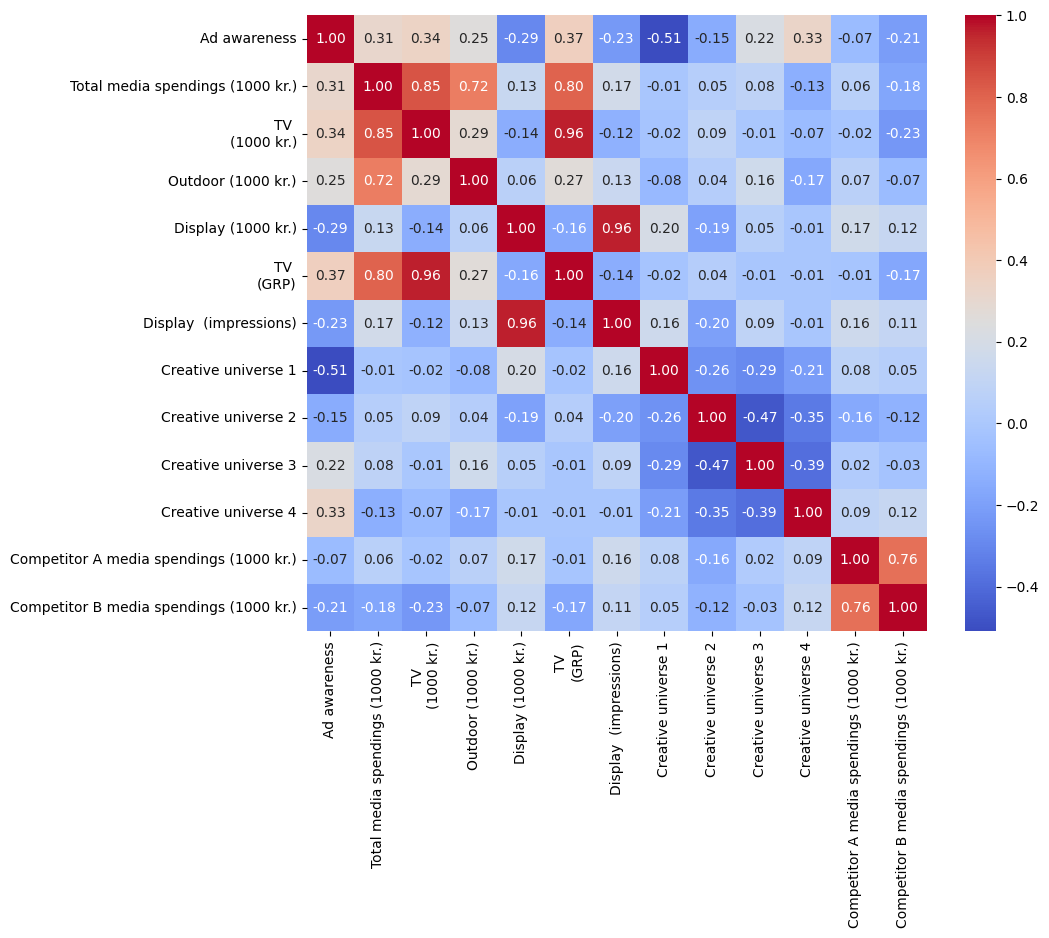

In [130]:
# Create a copy of the original dataframe excluding 'Year' and 'Week'
df_data_subset = df_data_original.drop(['Year', 'Week'], axis=1)

# Convert 'Ad awareness' from percentages to a numerical format
df_data_subset['Ad awareness'] = df_data_subset['Ad awareness'].str.rstrip('%').astype('float') / 100.0

# Calculate correlation matrix
corr = df_data_subset.corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

# **Question 3 - Test different models with different Adstock retentions and different weighting and aggregation of media spending**

In [131]:
#Testing that the decay output is the same as the one from the excel file, which contains a media input of 100:

# Initialize Adstock variables
adstock_50 = [100]
adstock_70 = [100]
adstock_90 = [100]

# Calculate Adstock for the first 10 weeks
for i in range(1, 10):
    adstock_50.append(0.5 * adstock_50[i-1])
    adstock_70.append(0.7 * adstock_70[i-1])
    adstock_90.append(0.9 * adstock_90[i-1])

# Print Adstock for each decay rate
print('Adstock with decay rate 0.5:', adstock_50)
print('Adstock with decay rate 0.7:', adstock_70)
print('Adstock with decay rate 0.9:', adstock_90)

Adstock with decay rate 0.5: [100, 50.0, 25.0, 12.5, 6.25, 3.125, 1.5625, 0.78125, 0.390625, 0.1953125]
Adstock with decay rate 0.7: [100, 70.0, 49.0, 34.3, 24.009999999999998, 16.807, 11.764899999999999, 8.23543, 5.764800999999999, 4.035360699999999]
Adstock with decay rate 0.9: [100, 90.0, 81.0, 72.9, 65.61000000000001, 59.049000000000014, 53.144100000000016, 47.829690000000014, 43.04672100000001, 38.742048900000015]


In [132]:
# Fill missing values with the mean
df_data.fillna(df_data.mean(), inplace=True)

# Define target variable
y = df_data['Ad awareness']

# Build and train models
models = {}
for rate in [0.5, 0.7, 0.9]:
    # Select feature variables
    X = df_data[[column + '_adstock_' + str(rate) for column in media_columns]]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store the model and the testing set
    models[rate] = (model, X_test)

# Evaluate models
for rate, (model, X_test) in models.items():
    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Print MSE
    print('Decay rate:', rate, 'MSE:', mse)

Decay rate: 0.5 MSE: 0.007912841643041318
Decay rate: 0.7 MSE: 0.007347420339842757
Decay rate: 0.9 MSE: 0.0056476414948525245


# **Note:**

We trained different linear regression models to predict 'Ad awareness' based on our media spending variables. Each model used a different decay rate in the Adstock transformation of the media spendings, representing the percentage of advertising impact that carries over to the next week.

**The first model used a decay rate of 0.5**, meaning we assumed that 50% of the advertising impact carries over to the next week. **The Mean Squared Error (MSE) of this model's predictions was approximately 0.0079**. MSE is a measure of the accuracy of the model's predictions, with lower values indicating more accurate predictions.

**The second model used a decay rate of 0.7**, or a 70% carry-over of advertising impact. **This model had a slightly lower MSE of about 0.0073, suggesting it was more accurate than the first model.**

**The third model used a decay rate of 0.9**, or a 90% carry-over of advertising impact. **This model had the lowest MSE of all, approximately 0.0056, indicating it provided the best fit to the data among the three models.**

These results suggest that assuming a higher carry-over of advertising impact leads to more accurate predictions of 'Ad awareness'. Specifically, the model that assumed 90% of the advertising impact carries over to the next week provided the most accurate predictions. This insight could be valuable for optimizing our advertising strategy and maximizing 'Ad awareness'.


# **Question 4 - Build different candidate models using Excel or other statistical tools**

In [133]:
# Define target variable and feature variables
y = df_data['Ad awareness']
X = df_data[[column + '_adstock_' + str(rate) for column in media_columns for rate in [0.5, 0.7, 0.9]]
            + ['Creative universe 1', 'Creative universe 2', 'Creative universe 3', 'Creative universe 4']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Evaluate the model
mse = mean_squared_error(y_test, lr_model.predict(X_test))

# Print MSE
print('Linear Regression MSE:', mse)

Linear Regression MSE: 0.0032231147695082276


In [134]:
# Define target variable and feature variables
y = df_data['Ad awareness']
X = df_data[[column + '_adstock_' + str(rate) for column in media_columns for rate in [0.5, 0.7, 0.9]]
            + ['Creative universe 1', 'Creative universe 2', 'Creative universe 3', 'Creative universe 4']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
mse = mean_squared_error(y_test, rf_model.predict(X_test))

# Print MSE
print('Random Forest Regressor MSE:', mse)

Random Forest Regressor MSE: 0.0027088467712380973


# **Note:**

We can see, that the Random Forest Regressor is more accurate than the Linear Regression Model. Nevertheless, this model is more complex to use an interprete model that the Linear Regression one to predict 'Ad awareness'. **We will focus on using a Linear Regression Model to have an easier interpretability.**

# **Question 5 - Present standard results from your models**

# **We are using 2 models:**

# **Model 1**

Is a standard OLS (Ordinary Least Squares) regression model fitted using the statsmodels library. This model is fitted on the entire dataset, and it provides detailed output including the intercept, coefficients, and p-values for each predictor. The p-values can be used to assess the statistical significance of each predictor.

In [135]:
print(df_data.columns)

Index(['Year', 'Week', 'Ad awareness', 'Total media spendings (1000 kr.)',
       'TV \n(1000 kr.)', 'Outdoor (1000 kr.)', 'Display (1000 kr.)',
       'TV \n(GRP)', 'Display  (impressions)', 'Creative universe 1',
       'Creative universe 2', 'Creative universe 3', 'Creative universe 4',
       'Competitor A media spendings (1000 kr.)',
       'Competitor B media spendings (1000 kr.)',
       'TV \n(1000 kr.)_adstock_0.5', 'TV \n(1000 kr.)_adstock_0.7',
       'TV \n(1000 kr.)_adstock_0.9', 'Outdoor (1000 kr.)_adstock_0.5',
       'Outdoor (1000 kr.)_adstock_0.7', 'Outdoor (1000 kr.)_adstock_0.9',
       'Display (1000 kr.)_adstock_0.5', 'Display (1000 kr.)_adstock_0.7',
       'Display (1000 kr.)_adstock_0.9',
       'Competitor A media spendings (1000 kr.)_adstock_0.5',
       'Competitor A media spendings (1000 kr.)_adstock_0.7',
       'Competitor A media spendings (1000 kr.)_adstock_0.9',
       'Competitor B media spendings (1000 kr.)_adstock_0.5',
       'Competitor B media sp

In [136]:
# Define your independent and dependent variables
X = df_data[['Total media spendings (1000 kr.)', 'TV \n(GRP)', 'Display  (impressions)',
             'Creative universe 1', 'Creative universe 2', 'Creative universe 3', 'Creative universe 4',
             'TV \n(1000 kr.)_adstock_0.9', 'Outdoor (1000 kr.)_adstock_0.9', 'Display (1000 kr.)_adstock_0.9',
             'Competitor A media spendings (1000 kr.)_adstock_0.9', 'Competitor B media spendings (1000 kr.)_adstock_0.9']]
y = df_data['Ad awareness']  # Dependent variable

# Add a constant to the independent value
X1 = sm.add_constant(X)

# Fit the model
results = sm.OLS(y, X1).fit()

# Print the intercept and coefficients
print('Intercept:', results.params[0])
print('Coefficients:\n', results.params[1:])

# Print the p-values
print("p-values:\n", results.pvalues)

Intercept: 0.33423389565572664
Coefficients:
 Total media spendings (1000 kr.)                       6.446248e-05
TV \n(GRP)                                             1.343978e-04
Display  (impressions)                                -1.035268e-07
Creative universe 1                                   -8.765822e-04
Creative universe 2                                    4.150449e-02
Creative universe 3                                    9.576243e-02
Creative universe 4                                    1.978436e-01
TV \n(1000 kr.)_adstock_0.9                            9.676286e-06
Outdoor (1000 kr.)_adstock_0.9                         2.795231e-05
Display (1000 kr.)_adstock_0.9                        -1.741108e-04
Competitor A media spendings (1000 kr.)_adstock_0.9    3.594389e-05
Competitor B media spendings (1000 kr.)_adstock_0.9   -2.860727e-05
dtype: float64
p-values:
 const                                                  2.227903e-21
Total media spendings (1000 kr.)            

# **Note:**

'Creative universe 2', 'Creative universe 3', and 'Creative universe 4' have positive coefficients and small p-values, indicating they have a statistically significant positive impact on 'Ad awareness'. Among them, **'Creative universe 4' has the largest coefficient, suggesting it has the strongest positive effect.**

**'Display (1000 kr.)_adstock_0.9'** has a negative coefficient and a small p-value, indicating it **has a statistically significant negative impact on 'Ad awareness'.**

**'Competitor A media spendings (1000 kr.)_adstock_0.9'** has a positive coefficient and a small p-value, indicating it **has a statistically significant positive impact on 'Ad awareness'.**

'Total media spendings (1000 kr.)' has a positive coefficient and a p-value just above 0.05, suggesting it might have a positive impact on 'Ad awareness', but this effect is borderline statistically significant.

The other variables ('TV \n(GRP)', 'Display (impressions)', 'Creative universe 1', 'TV \n(1000 kr.)_adstock_0.9', 'Outdoor (1000 kr.)_adstock_0.9', 'Competitor B media spendings (1000 kr.)_adstock_0.9') have p-values greater than 0.05, suggesting their effects on 'Ad awareness' are not statistically significant.

# **Note:**

In this company's model, the **intercept value is approximately 0.33, or 33% when we express it as a percentage. **This figure represents the baseline level of 'Ad awareness'. **In other words, even if this company did not invest any money in the advertising channels included in the model** (such as TV, Outdoor, Display, etc.), **and all other factors were also at zero, we would still expect the 'Ad awareness' to be at 33%.**

The **coefficients** represent the change in 'Ad awareness' for a one-unit change in the corresponding independent variable, assuming all other variables are held constant. A positive coefficient suggests that as the predictor increases, the 'Ad awareness' also increases. A negative coefficient suggests that as the predictor increases, the 'Ad awareness' decreases.

The **p-values** tell you the significance of each coefficient in the model. A small p-value (typically ≤ 0.05) indicates strong evidence that the coefficient is different from zero, suggesting that the predictor is meaningful for your model.

For instance, 'Creative universe 4' has a p-value of 3.383240e-07, which is very small, indicating that 'Creative universe 4' is a statistically significant predictor in this model. The coefficient for 'Creative universe 4' is positive, so it positively affects 'Ad awareness'.

# **Recommendations**

Based on the results of our analysis, we have some valuable insights that could help us optimize our advertising budget to increase Ad awareness.

**Increase Spending:** Our model shows that 'Creative universe 2', 'Creative universe 3', and 'Creative universe 4' are positively associated with 'Ad awareness'. This means that increasing our investment in these areas could potentially lead to an increase in 'Ad awareness'. In particular, 'Creative universe 4' seems to have the strongest positive effect, suggesting it could be a key area to focus our spending.

**Decrease or Reallocate Spending:** On the other hand, our model indicates that 'Display (1000 kr.)_adstock_0.9' has a negative impact on 'Ad awareness'. This suggests that increasing spending on 'Display (1000 kr.)_adstock_0.9' could actually decrease 'Ad awareness'. It might be beneficial for us to consider reducing our budget in this area and reallocating it to other areas that have a positive impact on 'Ad awareness'.

As for creating a model to show the best budget optimization, this would involve more complex techniques such as optimization algorithms or machine learning models. The goal would be to find the combination of spending across different channels that maximizes 'Ad awareness' while staying within our budget constraints. This could provide us with a powerful tool for making data-driven decisions about our advertising strategy.

Finally, it's important to note that predicting how much 'Ad awareness' could increase by optimizing the budget spend on all variables is not straightforward based on our current model. While the model provides estimates of the effects of individual variables, the actual increase in 'Ad awareness' would depend on specific changes in spending, interactions between different variables, and potentially other factors not included in the model. To make accurate predictions of this nature, we would likely need to use more advanced modeling approaches.

**Paradigm, could help to predict, how to best reallocate the media spend to predict which media spend and channels should be used to get the highest possible Ad Awareness.**

# **_______________________________________**

# **Model 2**

Is a linear regression model fitted using the sklearn library. Before fitting the model, the data is split into a training set (80% of the data) and a testing set (20% of the data). The model is trained on the training set and then used to make predictions on the testing set. The scatter plot visualizes the relationship between the actual and predicted values of 'Ad awareness' on the testing set.

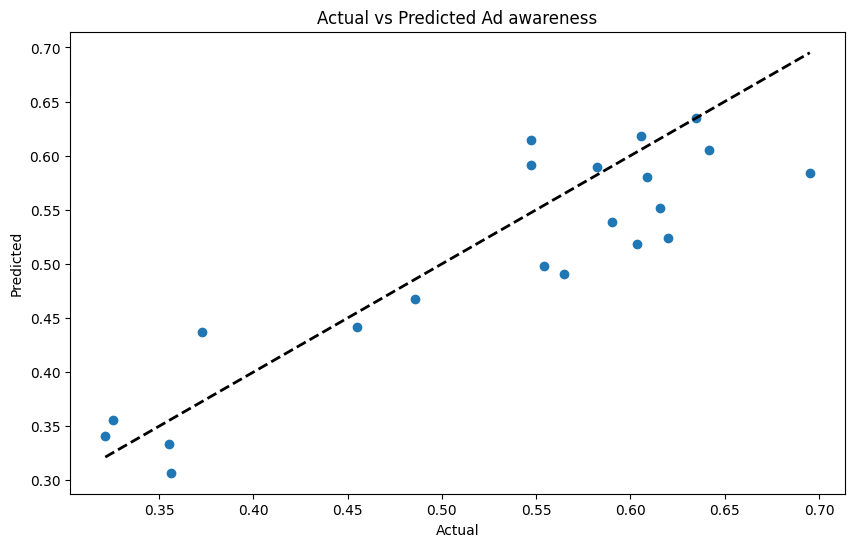

In [138]:
# Define your independent and dependent variables
X = df_data[['Total media spendings (1000 kr.)', 'TV \n(GRP)', 'Display  (impressions)',
             'Creative universe 1', 'Creative universe 2', 'Creative universe 3', 'Creative universe 4',
             'TV \n(1000 kr.)_adstock_0.9', 'Outdoor (1000 kr.)_adstock_0.9', 'Display (1000 kr.)_adstock_0.9',
             'Competitor A media spendings (1000 kr.)_adstock_0.9', 'Competitor B media spendings (1000 kr.)_adstock_0.9']]
y = df_data['Ad awareness']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Ad awareness')
# Add a line of perfect fit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [139]:
# Define your independent and dependent variables
X = df_data[['Total media spendings (1000 kr.)', 'TV \n(GRP)', 'Display  (impressions)',
             'Creative universe 1', 'Creative universe 2', 'Creative universe 3', 'Creative universe 4',
             'TV \n(1000 kr.)_adstock_0.9', 'Outdoor (1000 kr.)_adstock_0.9', 'Display (1000 kr.)_adstock_0.9',
             'Competitor A media spendings (1000 kr.)_adstock_0.9', 'Competitor B media spendings (1000 kr.)_adstock_0.9']]
y = df_data['Ad awareness']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print the intercept and coefficients as strings
print('Intercept:', str(lr_model.intercept_))
print('Coefficients:')
for coef, var in zip(lr_model.coef_, X.columns):
    print(var + ':', str(coef))

Intercept: 0.3878966426301638
Coefficients:
Total media spendings (1000 kr.): 8.052537717353656e-05
TV 
(GRP): 6.22906195306749e-05
Display  (impressions): -1.5717976380799777e-07
Creative universe 1: -0.07233140839107778
Creative universe 2: -0.047905153507336116
Creative universe 3: 0.008501336367540286
Creative universe 4: 0.11173522553088557
TV 
(1000 kr.)_adstock_0.9: 1.4808028531913598e-05
Outdoor (1000 kr.)_adstock_0.9: 2.429201646866853e-05
Display (1000 kr.)_adstock_0.9: -0.00016533906742220405
Competitor A media spendings (1000 kr.)_adstock_0.9: 3.789874864339155e-05
Competitor B media spendings (1000 kr.)_adstock_0.9: -2.6005314068351634e-05


# **Impact on 'Ad awareness', from highest to lowest:**

**Positive Impact on 'Ad awareness':**

'Creative universe 4': 0.11173522553088557
'Creative universe 3': 0.008501336367540286
'Competitor A media spendings (1000 kr.)_adstock_0.9': 3.789874864339155e-05
'Outdoor (1000 kr.)_adstock_0.9': 2.429201646866853e-05
'TV \n(1000 kr.)_adstock_0.9': 1.4808028531913598e-05
'Total media spendings (1000 kr.)': 8.052537717353656e-05
'TV \n(GRP)': 6.22906195306749e-05

**Negative Impact on 'Ad awareness':**

'Creative universe 1': -0.07233140839107778
'Creative universe 2': -0.047905153507336116
'Display (1000 kr.)_adstock_0.9': -0.00016533906742220405
'Competitor B media spendings (1000 kr.)_adstock_0.9': -2.6005314068351634e-05
'Display (impressions)': -1.5717976380799777e-07

# **Thoughts from these 2 models**

When we compare the two models, there are a few reasons why they might give us different results:

**Data Splitting:** In the second model, we divide our data into two parts: a training set and a testing set. The model learns from the training set, and then we test its performance on the testing set. Because the model is only learning from a portion of the data (the training set), it might not capture all the patterns in the full dataset. This could lead to some differences when compared to the first model, which uses all the data for learning.

**Randomness:** When we split the data in the second model, we do it randomly. This means that if we were to split the data differently, we might get slightly different models and predictions.

**Differences Between Libraries:** The first and second models use different Python libraries - 'statsmodels' and 'sklearn', respectively. These libraries might have slightly different ways of fitting the models, which could potentially lead to small differences in the results.

___

# **Question 6 - Present standard robustness test of your models**

**Independence:** We need to make sure the errors (residuals) are independent of each other. To check this, we can plot the residuals in the order of the data. If the plot doesn't show any patterns, the residuals are likely independent.

**Normal Distribution:** Our residuals should follow a normal distribution. We can verify this by looking at a histogram or a Q-Q plot of the residuals. Alternatively, we can use statistical tests like the Shapiro-Wilk test to check for normality.

**Homoscedasticity:** This means that the residuals should have constant variance at all levels of the predictors. We can check this by plotting the residuals against the predicted values. If the plot is just a random scatter without any funnel shape, it suggests we have homoscedasticity.

**Linearity:** The relationship between each predictor and the dependent variable should be linear. We can verify this by plotting the residuals against each predictor. If we see a random scatter around zero, it indicates linearity.

**Multicollinearity:** This happens when two or more predictors are highly correlated, making it hard to interpret the coefficients. We can detect multicollinearity using the Variance Inflation Factor (VIF). A VIF greater than 5 is a sign of high multicollinearity.

**Outliers and Leverage Points:** These are data points that have a big influence on our model. We can identify them using leverage vs. residual squared plots or Cook's distance.

**Zero Mean of Random Errors:** The mean of the residuals should be zero. We can check this simply by calculating the mean of the residuals.

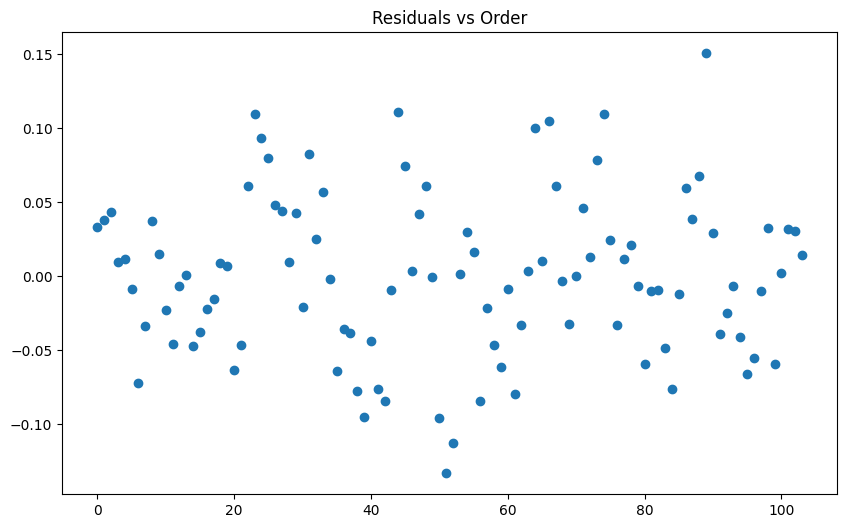

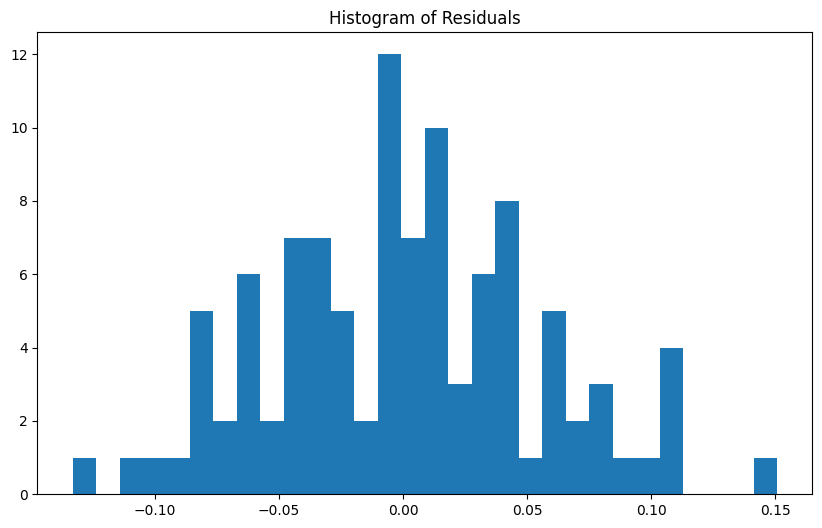

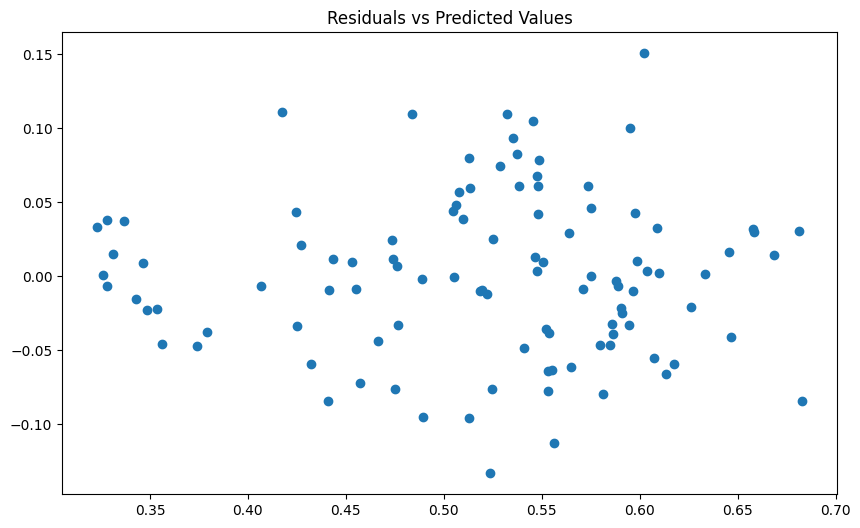

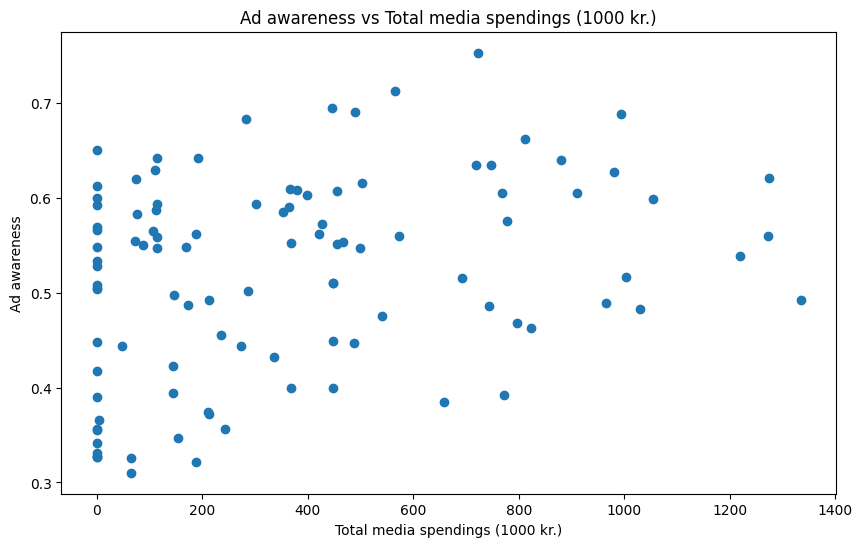

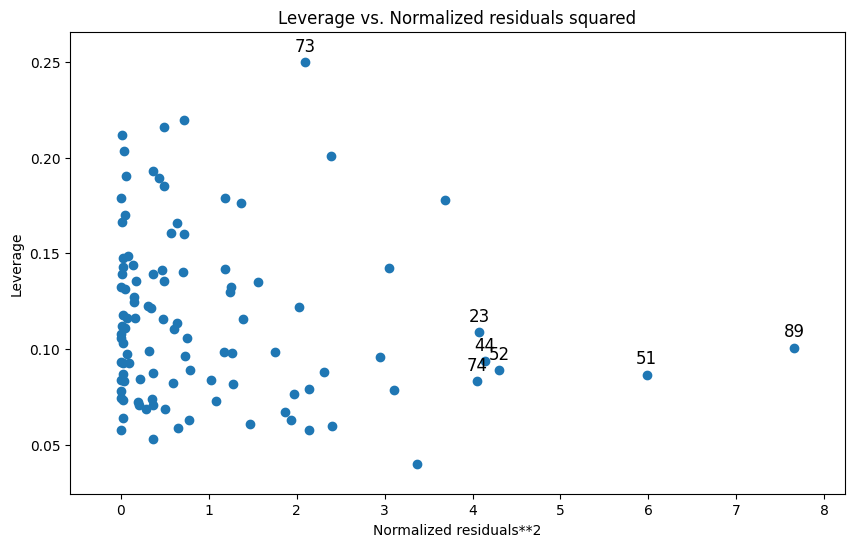

                                             Variable        VIF
0                    Total media spendings (1000 kr.)   4.156082
1                                          TV \n(GRP)   4.553254
2                              Display  (impressions)   2.183388
3                                 Creative universe 1   2.665143
4                                 Creative universe 2  14.128703
5                                 Creative universe 3  15.150673
6                                 Creative universe 4  12.725156
7                         TV \n(1000 kr.)_adstock_0.9   3.386066
8                      Outdoor (1000 kr.)_adstock_0.9   2.093610
9                      Display (1000 kr.)_adstock_0.9   3.821679
10  Competitor A media spendings (1000 kr.)_adstoc...  11.879640
11  Competitor B media spendings (1000 kr.)_adstoc...  11.701470
Mean of residuals: 1.8251959772623666e-14


In [141]:
# Fit the model
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()

# Calculate residuals
residuals = results.resid

# Check independence: residuals vs order
plt.figure(figsize=(10,6))
plt.scatter(range(len(residuals)), residuals)
plt.title('Residuals vs Order')
plt.show()

# Check normal distribution: histogram of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()

# Check homoscedasticity: residuals vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(results.fittedvalues, residuals)
plt.title('Residuals vs Predicted Values')
plt.show()

# Scatter plot of 'Ad awareness' vs 'Total media spendings (1000 kr.)'
plt.figure(figsize=(10,6))
plt.scatter(df_data['Total media spendings (1000 kr.)'], df_data['Ad awareness'])
plt.xlabel('Total media spendings (1000 kr.)')
plt.ylabel('Ad awareness')
plt.title('Ad awareness vs Total media spendings (1000 kr.)')
plt.show()

# Fit the model
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()

# Check outliers and leverage points: leverage vs residual squared plot
fig, ax = plt.subplots(figsize=(10,6))
plot_leverage_resid2(results, ax=ax)
plt.show()

# Check multicollinearity: VIF
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Check zero mean of random errors
print('Mean of residuals:', np.mean(residuals))

In [142]:
# Fit the model
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()

# Calculate residuals
residuals = results.resid

# Check zero mean of random errors
print('Mean of residuals:', str(np.mean(residuals)))

# Check multicollinearity: VIF
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('VIF:\n', vif.to_string(index=False))

# The other tests (independence, normal distribution, homoscedasticity, linearity, outliers and leverage points) involve visual inspection of plots, so they can't be directly converted to strings.

Mean of residuals: 1.8251959772623666e-14
VIF:
                                            Variable       VIF
                   Total media spendings (1000 kr.)  4.156082
                                         TV \n(GRP)  4.553254
                             Display  (impressions)  2.183388
                                Creative universe 1  2.665143
                                Creative universe 2 14.128703
                                Creative universe 3 15.150673
                                Creative universe 4 12.725156
                        TV \n(1000 kr.)_adstock_0.9  3.386066
                     Outdoor (1000 kr.)_adstock_0.9  2.093610
                     Display (1000 kr.)_adstock_0.9  3.821679
Competitor A media spendings (1000 kr.)_adstock_0.9 11.879640
Competitor B media spendings (1000 kr.)_adstock_0.9 11.701470


# **RESULTS FROM TESTS**

**Mean of Residuals (1.8251959772623666e-14): **This is the average error from our model. Ideally, this should be zero, and our value is extremely close to zero. This means that, **on average, our model's predictions are not systematically too high or too low for 'Ad awareness'.**

**Variance Inflation Factor (VIF): VIF measures multicollinearity among the predictors. A VIF greater than 5 indicates high multicollinearity**. In our results, 'Creative universe 2', 'Creative universe 3', 'Creative universe 4', 'Competitor A media spendings (1000 kr.)_adstock_0.9', and 'Competitor B media spendings (1000 kr.)_adstock_0.9' have VIFs greater than 5, suggesting they might be highly correlated with other predictors.

***Explaining high multicollinearity:***
As we can see, high multicollinearity is indicated by VIF values greater than 5. This means some of our predictor variables are highly correlated with each other, which can affect the reliability and interpretability of our regression models.

To address this multicollinearity, we might consider:

Removing some of the correlated predictors.
Combining the correlated predictors into a single predictor.
Using techniques like ridge regression or principal component analysis (PCA), which can handle multicollinearity.

_________________________
The following tests involve visual inspection of plots and thus could not be directly converted to strings:



**Independence:** Checked by plotting the residuals against the order of the data. If there's no pattern in the plot, it suggests the residuals are independent. (In this case we see that the residual values are **INDEPENDENT**)

**Normal Distribution:** Checked with a histogram or a Q-Q plot of the residuals. If the histogram looks approximately bell-shaped or the points in the Q-Q plot fall along a straight line, it suggests the residuals are normally distributed. (Due to the "bell" shape, we can see that **we have a NORMAL distribution**)

**Homoscedasticity:** Checked by plotting the residuals against the predicted values. If the plot shows a random scatter (no funnel shape), it suggests homoscedasticity. (**Here we can see that we have HOMOSCEDASTICITY**, which it's important to ensure that the residuals have a constant variance). If we had "heterosdascity, it wouldn't be good.

**Linearity:** Checked by plotting the residuals against each predictor. If the plot shows a random scatter around zero, it suggests linearity. (**We do have LINEARITY**)

**Outliers and Leverage Points:** Identified using leverage vs. residual squared plots or Cook's distance. Outliers are points with large residuals, while leverage points are points that have a large influence on the model.

# **To summarize, we can say that we have a robus regression model.**

# **__________**

# **Adding "Residual Diagnostics" for further testing.**

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


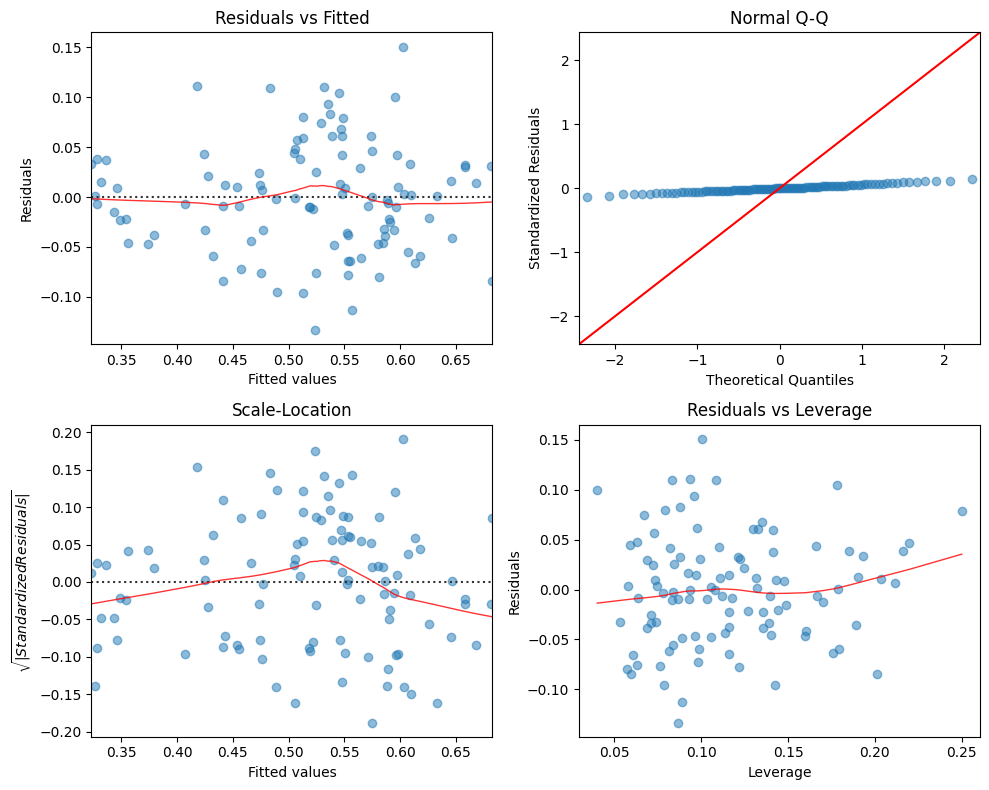

In [143]:
# Define your independent and dependent variables
X = df_data[['Total media spendings (1000 kr.)', 'TV \n(GRP)', 'Display  (impressions)',
             'Creative universe 1', 'Creative universe 2', 'Creative universe 3', 'Creative universe 4',
             'TV \n(1000 kr.)_adstock_0.9', 'Outdoor (1000 kr.)_adstock_0.9', 'Display (1000 kr.)_adstock_0.9',
             'Competitor A media spendings (1000 kr.)_adstock_0.9', 'Competitor B media spendings (1000 kr.)_adstock_0.9']]
y = df_data['Ad awareness']  # Dependent variable

# Add a constant to the predictor variables
X1 = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X1)
results = model.fit()

# Create residuals
residuals = results.resid
fitted = results.fittedvalues

# Create a figure and axes
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Residuals vs Fitted values plot
sns.residplot(x=fitted, y=residuals, lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax[0, 0])
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')

# Normal Q-Q plot
QQ = ProbPlot(residuals)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax[0, 1])
ax[0, 1].set_title('Normal Q-Q')
ax[0, 1].set_xlabel('Theoretical Quantiles')
ax[0, 1].set_ylabel('Standardized Residuals');

# Scale-Location plot
sns.residplot(x=fitted, y=np.sqrt(np.abs(residuals)), lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax[1, 0])
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# Residuals vs Leverage plot
sns.regplot(x=results.get_influence().hat_matrix_diag, y=residuals, lowess=True, scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax[1, 1])
ax[1, 1].set_title('Residuals vs Leverage')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Residuals')

# Adjust layout
fig.tight_layout()

In [144]:
# Print residuals and fitted values
print("Residuals:\n", residuals.to_string())
print("\nFitted Values:\n", fitted.to_string())
print("\nLeverage:\n", results.get_influence().hat_matrix_diag)

Residuals:
 0      0.033163
1      0.038139
2      0.043583
3      0.009657
4      0.011621
5     -0.008771
6     -0.072225
7     -0.033289
8      0.037499
9      0.015059
10    -0.022765
11    -0.045855
12    -0.006766
13     0.000948
14    -0.047213
15    -0.037674
16    -0.022238
17    -0.015336
18     0.008994
19     0.006623
20    -0.063650
21    -0.046250
22     0.060696
23     0.110009
24     0.093495
25     0.079733
26     0.048010
27     0.044160
28     0.009491
29     0.042448
30    -0.020542
31     0.082738
32     0.025451
33     0.056798
34    -0.002063
35    -0.064326
36    -0.035977
37    -0.038223
38    -0.077658
39    -0.095220
40    -0.043809
41    -0.075878
42    -0.084346
43    -0.009057
44     0.110816
45     0.074481
46     0.003453
47     0.041935
48     0.061222
49    -0.000700
50    -0.096075
51    -0.133191
52    -0.112987
53     0.001474
54     0.030135
55     0.016381
56    -0.084154
57    -0.021537
58    -0.046638
59    -0.061454
60    -0.008768
61    -0.079

In [145]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Ad awareness   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     22.63
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.28e-21
Time:                        17:51:30   Log-Likelihood:                 155.08
No. Observations:                 104   AIC:                            -286.2
Df Residuals:                      92   BIC:                            -254.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

# **Main findings:**

**Residuals**

Residuals represent the difference between the observed and predicted values. Here are the key points:

- The residuals are quite small, suggesting that the model's predictions are relatively accurate.
There are both positive and negative residuals, which is typical and expected.

**Fitted Values**

Fitted values are the predicted values from the regression model. These values appear to be well-distributed and cover a reasonable range, indicating that the model is providing a good fit across different levels of 'Ad awareness'.

**Leverage**

Leverage values help identify data points that have a significant impact on the regression model. Values closer to 1 indicate higher leverage. Here are some observations:

- Most leverage values are below 0.2, suggesting that there aren't extreme leverage points.
- A few points have leverage values above 0.2, which might warrant further investigation to ensure they are not unduly influencing the model.

**Model Summary**

- R-squared (0.730): This value indicates that approximately 73% of the variance in 'Ad awareness' is explained by the model. This is a good indication of the model's overall fit.
- Adjusted R-squared (0.698): This adjusts for the number of predictors in the model, and still suggests a strong fit.
- F-statistic (22.63, p-value = 1.28e-21): This shows that the overall model is statistically significant.

**Coefficients**

The table provides coefficients for each predictor along with their standard errors, t-values, and p-values.

- Total media spendings (1000 kr.): The coefficient is very small and close to being statistically significant (p = 0.052).
- TV (GRP): Not statistically significant (p = 0.496).
- Display (impressions): Not statistically significant (p = 0.684).
- Creative universe 1: Not statistically significant (p = 0.957).
- Creative universe 2, 3, 4: Statistically significant, especially 'Creative universe 4' with a high t-value (10.019) and a p-value of 0.000.
- TV (1000 kr.)_adstock_0.9: Not statistically significant (p = 0.526).
- Outdoor (1000 kr.)_adstock_0.9: Not statistically significant (p = 0.187).
- Display (1000 kr.)_adstock_0.9: Statistically significant and negatively associated (p = 0.000).
- Competitor A media spendings (1000 kr.)_adstock_0.9: Statistically significant (p = 0.004).
- Competitor B media spendings (1000 kr.)_adstock_0.9: Close to significance (p = 0.063).

**Multicollinearity**

The note about the smallest eigenvalue (4.82e-26) indicates potential multicollinearity issues or that the design matrix might be singular. This means that some predictors might be highly correlated, which can impact the reliability and stability of the coefficient estimates. The high VIF values for some predictors also suggest multicollinearity.

**Diagnostic Tests**

- Omnibus (0.618, p = 0.734) and Jarque-Bera (0.665, p = 0.717): These tests suggest that the residuals are normally distributed.
- Durbin-Watson (0.903): This value indicates potential positive autocorrelation in the residuals, suggesting that residuals might not be independent.

**Key Points to Address**

- Multicollinearity: Consider addressing multicollinearity by removing or combining highly correlated predictors, or using techniques like ridge regression or principal component analysis (PCA).
- Autocorrelation: Investigate the independence of residuals. Potential positive autocorrelation might suggest a need to adjust the model or consider time-series modeling if applicable.

# **Overall, the model explains a significant portion of the variance in 'Ad awareness', but addressing multicollinearity and potential autocorrelation would help improve the model's reliability and interpretability.**

___

# **Question 7 - Calculate decomposition of your candidate model - how big a proportion of awareness is driven by media?**

In [146]:
# Define your media variables
X_media = df_data[['TV \n(1000 kr.)_adstock_0.9', 'Outdoor (1000 kr.)_adstock_0.9',
                   'Display (1000 kr.)_adstock_0.9', 'Competitor A media spendings (1000 kr.)_adstock_0.9',
                   'Competitor B media spendings (1000 kr.)_adstock_0.9']]

# Add a constant to the predictor variables
X1_media = sm.add_constant(X_media)

# Fit the model
model_media = sm.OLS(y, X1_media)
results_media = model_media.fit()

# Print the R-squared value
print('R-squared:', results_media.rsquared)

R-squared: 0.44145669748856786


# **Explanation**

According to this model, **around 44.15% of 'Ad awareness' is driven by these media variables**. The remaining variation in 'Ad awareness' is due to other factors not included in this model or random variation.

**____________**

# **Question 8 - Calculate SOE / SOB - which media group is most efficient given level of investment? (results per universe and per media group)**

SOE = Share of Effect

SOB = Share of Budget